**Examine performance of various clustering algorithms on Iris dataset**

Steps:
* Load Iris dataset
* Cluster dataset by 4 features (sepal & petal length & width) using various clustering algorithms (and combinations of parameters within algorithms)
* Examine various metrics to evaluate 'goodness' of clustering (some metrics require truth and others don't and use intrinsic measures)

In [1]:
# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import sklearn
print 'sklearn.version = ', sklearn.__version__

import numpy as np
print 'numpy.version = ', np.__version__
import pandas as pd
print 'pandas.version = ', pd.__version__

import matplotlib
print 'matplotlib.version = ', matplotlib.__version__
import matplotlib.pyplot as plt

import seaborn as sns
print 'seaborn.version = ', sns.__version__

from sklearn import datasets as d
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics


/Users/vissan1/GitHub/ml/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


sklearn.version =  0.18
numpy.version =  1.11.2
pandas.version =  0.19.1
matplotlib.version =  1.5.3
seaborn.version =  0.7.1


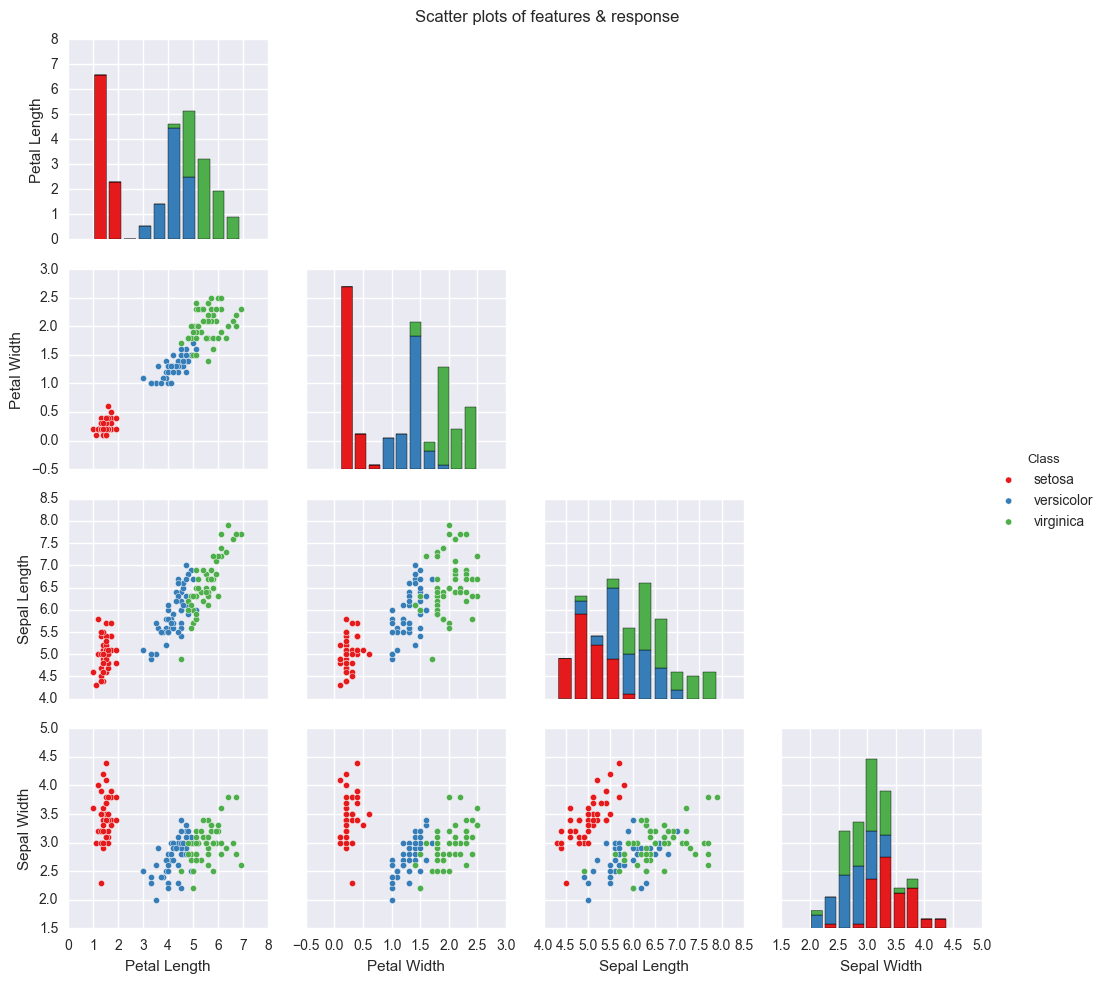

In [2]:
# ----------
# Load Iris dataset and plot data
# ----------

iris = d.load_iris()
X, y = iris.data, iris.target

df = pd.DataFrame({
        'Sepal Length': X[:,0],
        'Sepal Width': X[:,1],
        'Petal Length': X[:,2],
        'Petal Width': X[:,3],
        'Class': y
    })

df.replace({'Class': {
            0:'setosa',
            1: 'versicolor',
            2: 'virginica'
        }}, inplace=True)

g = sns.pairplot(df, hue='Class', palette='Set1');
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i,j].set_visible(False)

plt.subplots_adjust(top=0.95)
g.fig.suptitle('Scatter plots of features & response');


In [27]:
# ----------
# Cluster data with various algorithms
# ----------

# K-Means
print 'K-Means \n----------\n'
kmeans_estimator = KMeans(n_clusters=3).fit(X)
for attr in dir(kmeans_estimator):
    if (not attr.startswith('_')) and attr.endswith('_'): 
        print attr
        print getattr(kmeans_estimator, attr),  '\n'

kmeans_labels = kmeans_estimator.labels_
kmeans_labels
print '\n'

# GMMs
print 'GMMs \n----------\n'
gmm_estimator_array = pd.DataFrame
for i in range(10):
    gmm_estimator = GaussianMixture(n_components=1, n_init=10).fit(X)
    gmm_labels = gmm_estimator.predict(X)
    

labels_array = ['kmeans_labels', 'gmm_labels']
algorithms = ['K-Means', 'GMM']

print '\n'

K-Means 
----------

cluster_centers_
[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]] 

inertia_
78.9408414261 

labels_
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0] 

n_iter_
5 



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)



GMMs 
----------

converged_
True 

covariances_
[[[ 0.27550587  0.09663458  0.18542939  0.05476915]
  [ 0.09663458  0.09255531  0.09103836  0.04299877]
  [ 0.18542939  0.09103836  0.20227635  0.0616792 ]
  [ 0.05476915  0.04299877  0.0616792   0.03232217]]

 [[ 0.121765    0.098292    0.015816    0.010336  ]
  [ 0.098292    0.142277    0.011448    0.011208  ]
  [ 0.015816    0.011448    0.029505    0.005584  ]
  [ 0.010336    0.011208    0.005584    0.011265  ]]

 [[ 0.38741443  0.09223101  0.30244612  0.06089936]
  [ 0.09223101  0.11040631  0.08386768  0.0557538 ]
  [ 0.30244612  0.08386768  0.32595958  0.07283247]
  [ 0.06089936  0.0557538   0.07283247  0.08488025]]] 

lower_bound_
-1.20686462675 

means_
[[ 5.91697517  2.77803998  4.20523542  1.29841561]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.54632887  2.94943079  5.4834877   1.98716063]] 

n_iter_
16 

precisions_
[[[  10.14292849   -4.47536194   -9.22844257    6.3769996 ]
  [  -4.47536194   31.04556976    0.983

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
# ----------
# Evaluate accuracy of KMeans clustering using various metrics
# ----------

clustering_metrics = pd.DataFrame(
                    index = [
                             'Adj Rand Index', 
                             'Mutual Info Score', 'Adj Mutual Info Score', 'Normalized Mutual Info Score', 
                             'Homogeneity Score', 'Completeness Score', 'V-Measure',
                             'F-M Score',
                             'Silhouette Score', 'Calinski-Harabaz Score'
                            ],
                    columns = ['K-Means', 'GMM'])



for l, alg in zip(labels_array, algorithms):
    pred_labels = globals()[l]
    # Clustering metrics that require known truth
    clustering_metrics[alg]['Adj Rand Index'] = format(round(metrics.adjusted_rand_score(y, pred_labels),3))
    clustering_metrics[alg]['Mutual Info Score'] = round(metrics.mutual_info_score(y, pred_labels),3)
    clustering_metrics[alg]['Adj Mutual Info Score'] = round(metrics.adjusted_mutual_info_score(y, pred_labels),3)
    clustering_metrics[alg]['Normalized Mutual Info Score'] = round(metrics.normalized_mutual_info_score(y, pred_labels),3)
    clustering_metrics[alg]['Homogeneity Score'] = round(metrics.homogeneity_score(y, pred_labels),3)
    clustering_metrics[alg]['Completeness Score'] = round(metrics.completeness_score(y, pred_labels),3)
    clustering_metrics[alg]['V-Measure'] = round(metrics.v_measure_score(y, pred_labels),3)
    clustering_metrics[alg]['F-M Score'] =  round(metrics.fowlkes_mallows_score(y, pred_labels),3)

    # Metrics that don't require truth to be known
    # clustering_metrics['K-Means']['Inertia'] = round(kmeans_estimator.inertia_,3)
    clustering_metrics[alg]['Silhouette Score'] = round(metrics.silhouette_score(X, pred_labels),3)
    clustering_metrics[alg]['Calinski-Harabaz Score'] = round(metrics.calinski_harabaz_score(X, pred_labels),3)

clustering_metrics

,K-Means,GMM
Adj Rand Index,0.73,0.904
Mutual Info Score,0.826,0.987
Adj Mutual Info Score,0.748,0.897
Normalized Mutual Info Score,0.758,0.9
Homogeneity Score,0.751,0.898
Completeness Score,0.765,0.901
V-Measure,0.758,0.9
F-M Score,0.821,0.936
Silhouette Score,0.553,0.501
Calinski-Harabaz Score,560.4,480.786


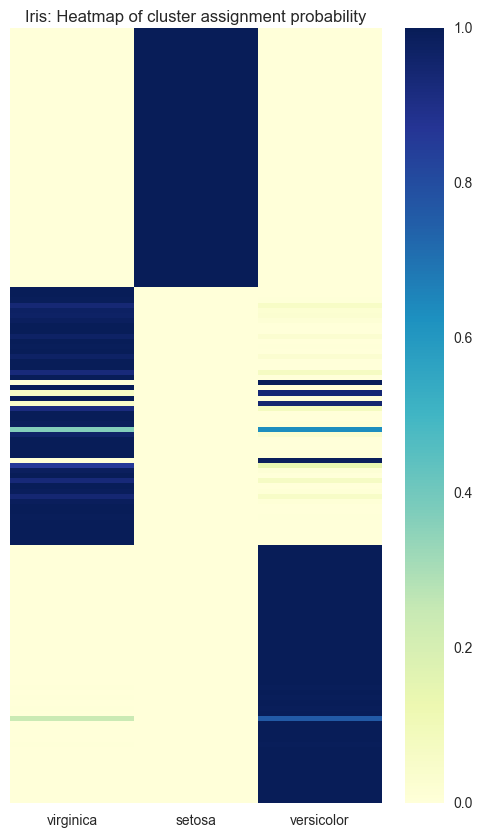

In [92]:

gmm_prob = gmm3_estimator.predict_proba(X)
gmm_prob = np.around(gmm_prob,3)

df = pd.DataFrame(gmm_prob)

# df[0:50].describe()
# df[51:100].describe()
# df[101:150].describe()

plt.figure(figsize=(6, 10))
sns.heatmap(gmm_prob, cmap='YlGnBu', yticklabels=False, xticklabels=['virginica', 'setosa', 'versicolor']);
plt.title('Iris: Heatmap of cluster assignment probability');
